>> ## Descriptive Statistics

In [1]:
import pandas as pd
import os
os.chdir('..')


>>> #### Load data

In [2]:
data = pd.read_csv("./data/raw_analyst_ratings.csv")

>>> #### Confirm data read

In [3]:
data.head(10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


>>> #### Descriptive Statistics for 'Headline' Lengths

In [4]:
from scripts.descriptive import get_headline_length_stats

headline_statistics = get_headline_length_stats(data)

In [5]:
headline_statistics

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

>>> #### Count Articles per Publisher

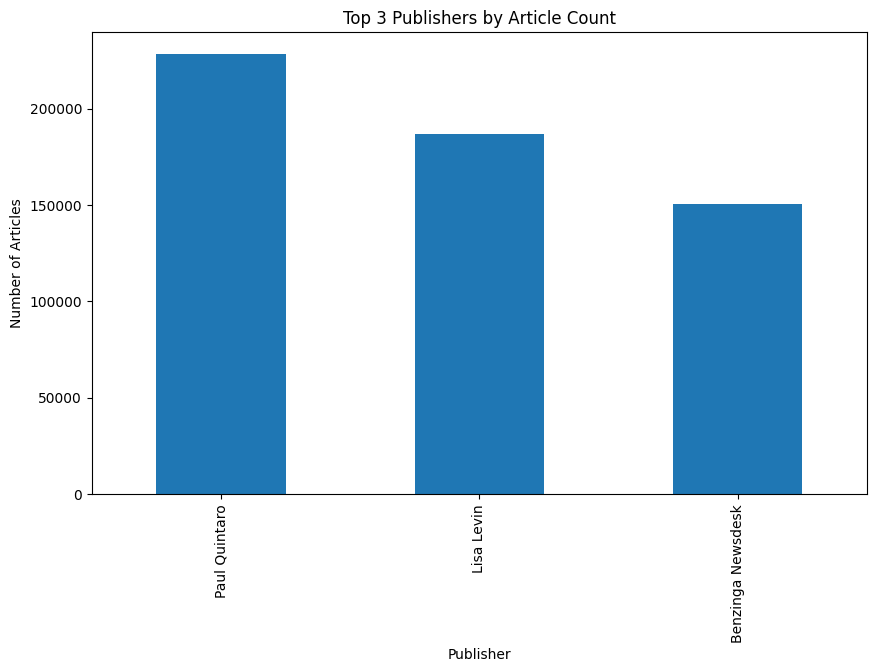

In [6]:
from scripts.descriptive import analyze_publisher_activity

publisher_activity = analyze_publisher_activity(data, publisher_column='publisher', top_n=3, visualize=True)

>>> #### Analyze Publication Dates for Trends

>>>> ##### Allow Pandas to Infer the Format

In [9]:
data['date'] = pd.to_datetime(data['date'], errors='coerce', utc=True)

In [13]:
data.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,Friday
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,71,Friday
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,73,Friday
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,120,Friday
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,84,Friday
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,42,Friday


In [10]:
from scripts.analyzePublicationDate import convert_to_datetime

data = convert_to_datetime(data, 'date')

>>>> ##### Article per day

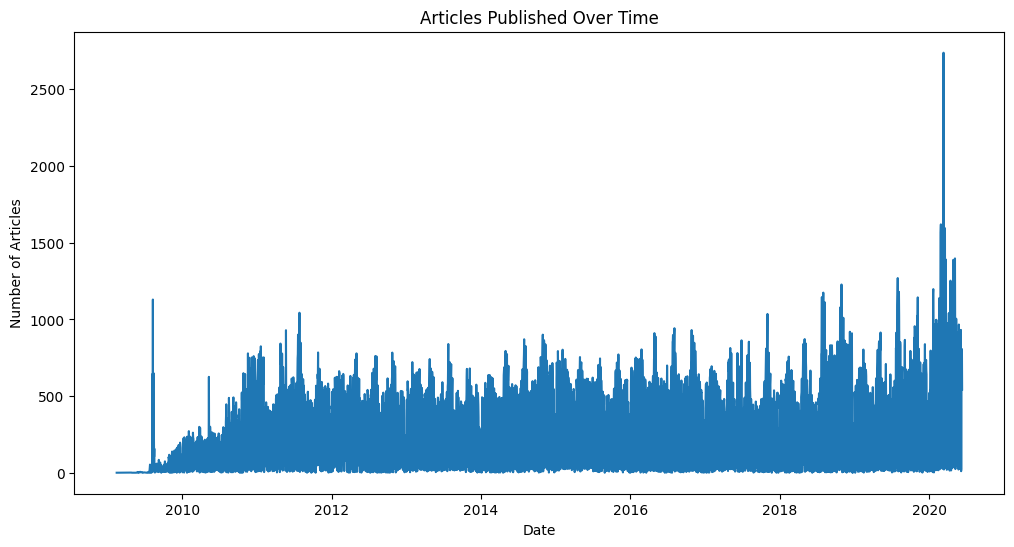

In [11]:
from scripts.analyzePublicationDate import articles_per_day

daily_article = articles_per_day(data, 'date')

>>>> ##### Articles per Day of the Week

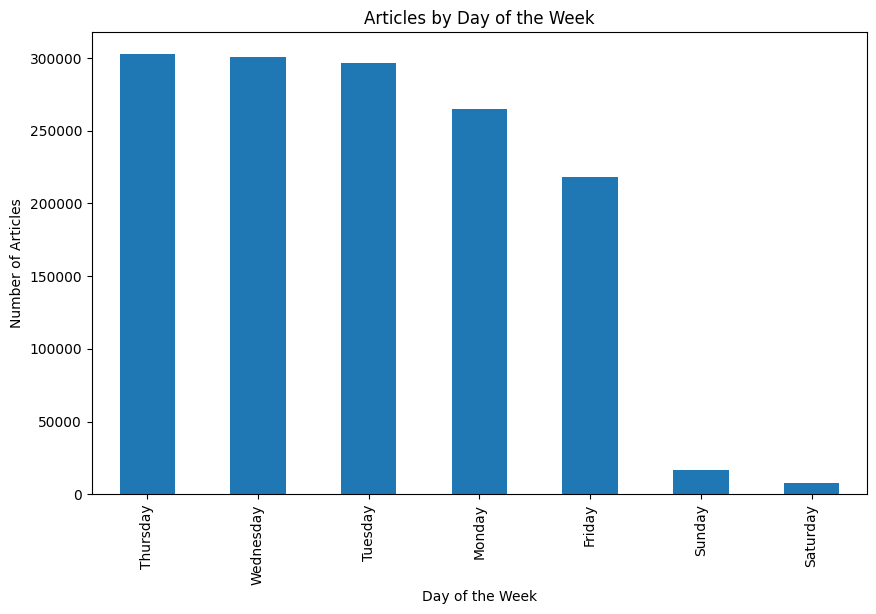

In [12]:
from scripts.analyzePublicationDate import articles_by_weekday

weekday_article = articles_by_weekday(data, 'date')

>>>> ##### Articles During Specific Events

In [18]:
from scripts.analyzePublicationDate import filter_by_date_range

filtered_data = filter_by_date_range(data, 'date', start_date='2020-06-03', end_date='2020-06-05')

filtered_data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,Wednesday
1437,1839,Shares of several basic materials are trading ...,https://www.benzinga.com/wiim/20/06/16183243/s...,Benzinga Newsdesk,2020-06-04 18:46:13+00:00,AA,241,Thursday
1438,1840,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16169849/s...,Benzinga Newsdesk,2020-06-03 14:19:06+00:00,AA,196,Wednesday
4891,5331,Shares of several apparel and retail companies...,https://www.benzinga.com/wiim/20/06/16182287/s...,Benzinga Newsdesk,2020-06-04 16:45:24+00:00,AAN,176,Thursday
4892,5332,SunTrust Robinson Humphrey Maintains Buy on Aa...,https://www.benzinga.com/news/20/06/16178528/s...,Benzinga Newsdesk,2020-06-04 12:03:50+00:00,AAN,79,Thursday
...,...,...,...,...,...,...,...,...
1403105,1409620,Shares of videogame companies are trading lowe...,https://www.benzinga.com/wiim/20/06/16171596/s...,Benzinga Newsdesk,2020-06-03 16:55:30+00:00,ZNGA,213,Wednesday
1406309,1412830,"Zumiez Says 69% Of Stores Open As Of May 30, S...",https://www.benzinga.com/news/20/06/16184259/z...,Benzinga Newsdesk,2020-06-04 20:10:37+00:00,ZUMZ,125,Thursday
1406310,1412831,Zumiez Will Not Give Q2 Guidance,https://www.benzinga.com/news/20/06/16184225/z...,Benzinga Newsdesk,2020-06-04 20:08:51+00:00,ZUMZ,32,Thursday
1406311,1412832,"Zumiez Q1 EPS $(0.84) Misses $(0.43) Estimate,...",https://www.benzinga.com/news/earnings/20/06/1...,Benzinga Newsdesk,2020-06-04 20:07:40+00:00,ZUMZ,84,Thursday


>>> ### Text Analysis


>>>> #### Sentiment analysis

In [19]:
from scripts.sentimentAnalysis import perform_sentiment_analysis

data = perform_sentiment_analysis(data, 'headline')

In [23]:
data[['headline', 'sentiment', 'sentiment_category']]

,headline,sentiment,sentiment_category
0,Stocks That Hit 52-Week Highs On Friday,0.00,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.00,neutral
2,71 Biggest Movers From Friday,0.00,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.00,neutral
4,B of A Securities Maintains Neutral on Agilent...,0.00,neutral
...,...,...,...
1407323,Top Narrow Based Indexes For August 29,0.15,positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,0.15,positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,0.00,neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,0.00,neutral


>>>> #### Topic Modeling using LDA

In [25]:
from scripts.topicModeling import perform_topic_modeling
# Perform topic modeling
topics = perform_topic_modeling(data, text_column='headline', n_topics=2, n_words=5)

In [26]:
# Display topics
for idx, topic in enumerate(topics):
    print(f"Topic {idx + 1}: {', '.join(topic)}")

Topic 1: market, shares, update, stocks, earnings
Topic 2: vs, est, eps, reports, stocks


>>> #### Time series Analyze

In [27]:
from scripts.timeSeriesAnalysis import prepare_news_data

news_data = prepare_news_data(data, date_column='date')

>>>> ##### Analyze Publication Frequency

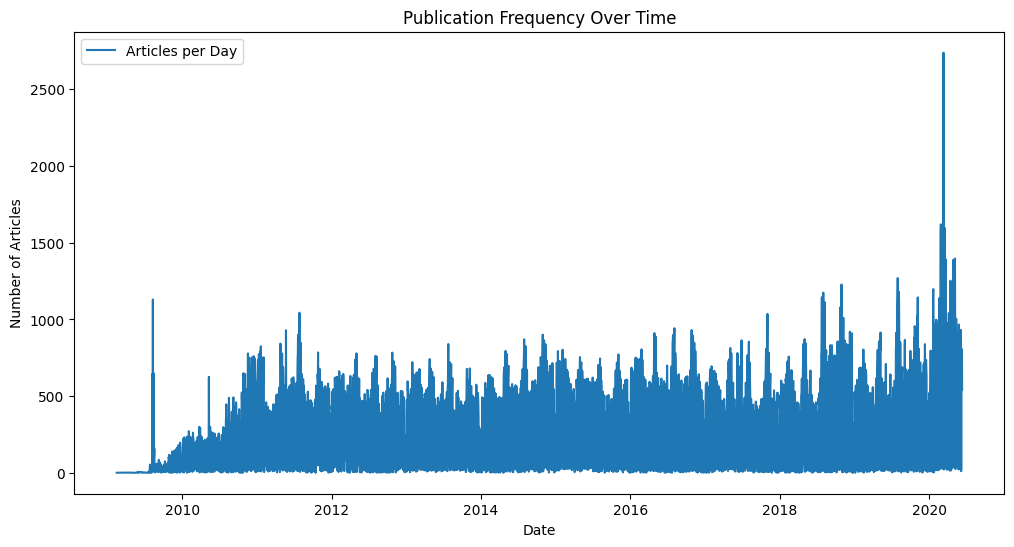

In [28]:
from scripts.timeSeriesAnalysis import analyze_publication_frequency

daily_counts = analyze_publication_frequency(news_data, date_column='date_only', visualize=True)

>>>> ##### Analyze Publishing Times

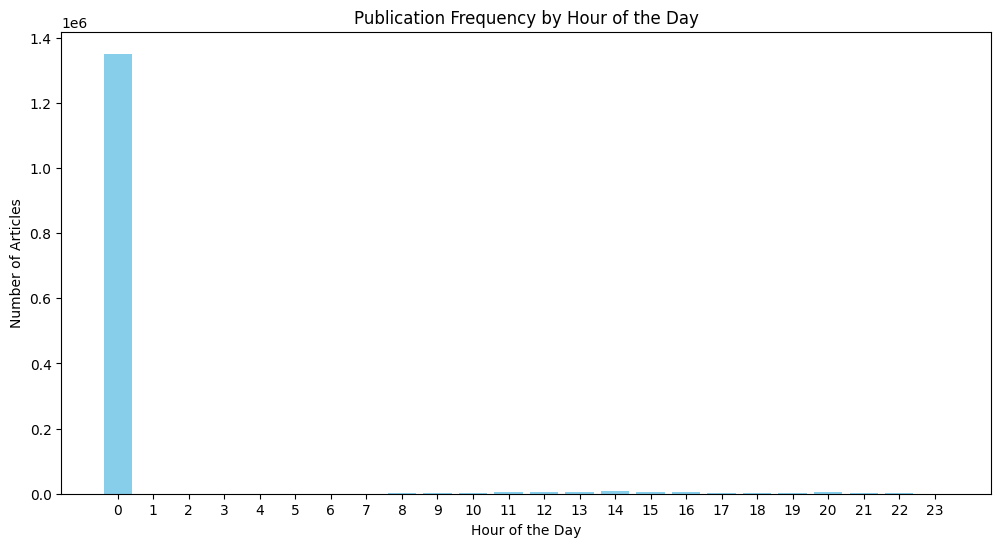

In [29]:
from scripts.timeSeriesAnalysis import analyze_publishing_times

hourly_counts = analyze_publishing_times(news_data, hour_column='hour', visualize=True)

>>>> ##### Overlay Market Events

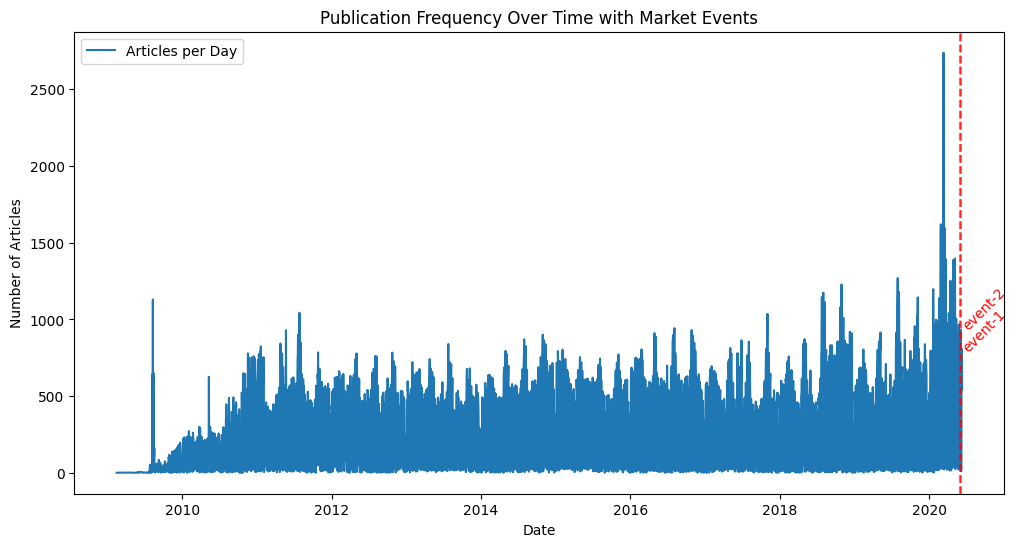

In [31]:
from scripts.timeSeriesAnalysis import overlay_market_events

market_events = {'2020-06-03':'event-1', '2020-06-05':'event-2'}
daily_counts_with_events = overlay_market_events(daily_counts, event_dates=market_events, date_column='date_only', visualize=True)